<a href="https://colab.research.google.com/github/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-Based-on-Clinical-Data/blob/main/All_variables_PPGBP_RAM_documented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PPG-BP Feature Extraction Notebook
This notebook processes photoplethysmography (PPG) signals and extracts relevant variables for blood pressure prediction. It includes data loading, signal processing, peak detection, and feature computation.

## 1. Environment Setup
Import the PPG-BP.csv file

In [1]:
# We import the dataset from  PPG-BP
# We have a csv containing this file
from google.colab import files
uploaded = files.upload()

Saving PPG-BP dataset.csv to PPG-BP dataset.csv


## 2. Code Block 2
Import libraries for plotting and maniuplating arrays

In [2]:
import seaborn as sns # We import seaborn to generate graphs
import io
import numpy as np #Library to manage arrays
import pandas as pd #Lirary for mange dataframes
import matplotlib.pyplot as plt # Library to make plots.
#Import csv into a dataframe
df = pd.read_csv(io.BytesIO(uploaded['PPG-BP dataset.csv'])) # we save the data of the csv in a dataframe (DF)
print("Complete Data shape:", df.shape)
print("Data shape withput NA values",df.dropna().shape)

Complete Data shape: (219, 14)
Data shape withput NA values (0, 14)


## 3. Code Block 3
Description: Missing values handling

In [3]:
columns_na = df.isnull().sum(axis = 0) # We analize if there are missing values in the dataset.
#pd.set_option('display.max_rows', None)
columns_na

,0
Num.,0
subject_ID,0
Sex(M/F),0
Age(year),0
Height(cm),0
Weight(kg),0
Systolic Blood Pressure(mmHg),0
Diastolic Blood Pressure(mmHg),0
Heart Rate(b/m),0
BMI(kg/m^2),0


## 4. Code Block 4
Description: Compute descriptive statistics from the dataset

In [4]:
# We use this
df.describe()

,Num.,subject_ID,Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2)
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,110.000000,156.598174,57.168950,161.228311,60.191781,127.945205,71.849315,73.639269,23.107215
std,63.364028,101.604347,15.874327,8.202871,11.886301,20.377779,11.111203,10.738874,4.004302
min,1.000000,2.000000,21.000000,145.000000,36.000000,80.000000,42.000000,52.000000,14.690000
25%,55.500000,85.500000,48.000000,155.000000,52.500000,113.500000,64.000000,66.000000,20.550000
50%,110.000000,152.000000,58.000000,160.000000,60.000000,126.000000,70.000000,73.000000,22.600000
75%,164.500000,214.500000,67.500000,167.000000,66.500000,139.000000,78.000000,80.000000,25.000000
max,219.000000,419.000000,86.000000,196.000000,103.000000,182.000000,107.000000,106.000000,37.460000


## 5. Code Block 5
Description: *Count number of samples in each of the classes in the dataset*

In [5]:
classes = df['Hypertension'].value_counts() # We count the number of samples in each of the classes
classes

,count
Hypertension,
Prehypertension,85
Normal,80
Stage 1 hypertension,34
Stage 2 hypertension,20


## 6. Code Block 6
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

Text(0.5, 1.0, 'Quantity of each class')

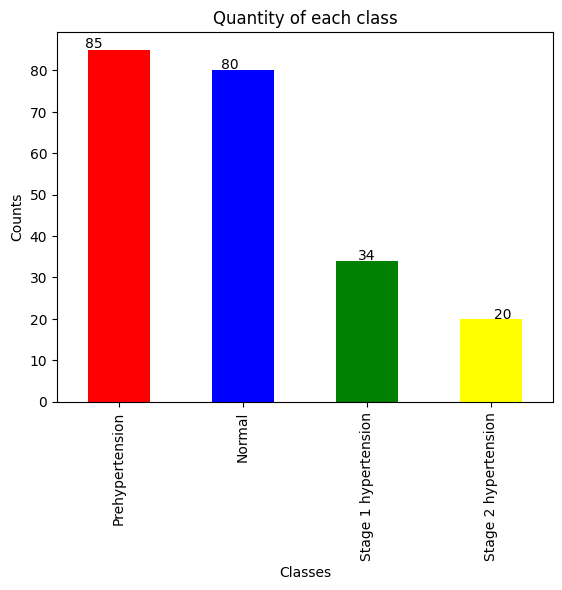

In [6]:
ax = classes.plot.bar(rot = 90, color=["red", "blue", "green","yellow"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.1, p.get_height() * 1.005))
ax.set_ylabel("Counts")
ax.set_xlabel("Classes")
ax.set_title("Quantity of each class")

## 7. Code Block 7
Description: *Drop the columns that are not useful for the prediction*

In [7]:
# We are droping the columns that are not needed for the present analysis
df_ch3 = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease'], axis =1)

## 8. Code Block 8
Description: *Visualize the dataframe with the dropcolumns*

In [8]:
# We visualize the first rows of the dataset
df_ch3.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,Female,24,155,38,96,67,82,15.82,Normal
1,Male,58,168,45,116,60,78,15.94,Normal
2,Female,58,160,42,111,65,67,16.41,Normal
3,Female,30,161,44,105,70,85,16.97,Normal
4,Male,67,159,43,116,61,80,17.01,Normal


## 9. Code Block 9
Description: *Plot correlation heatmap between numerical variables*

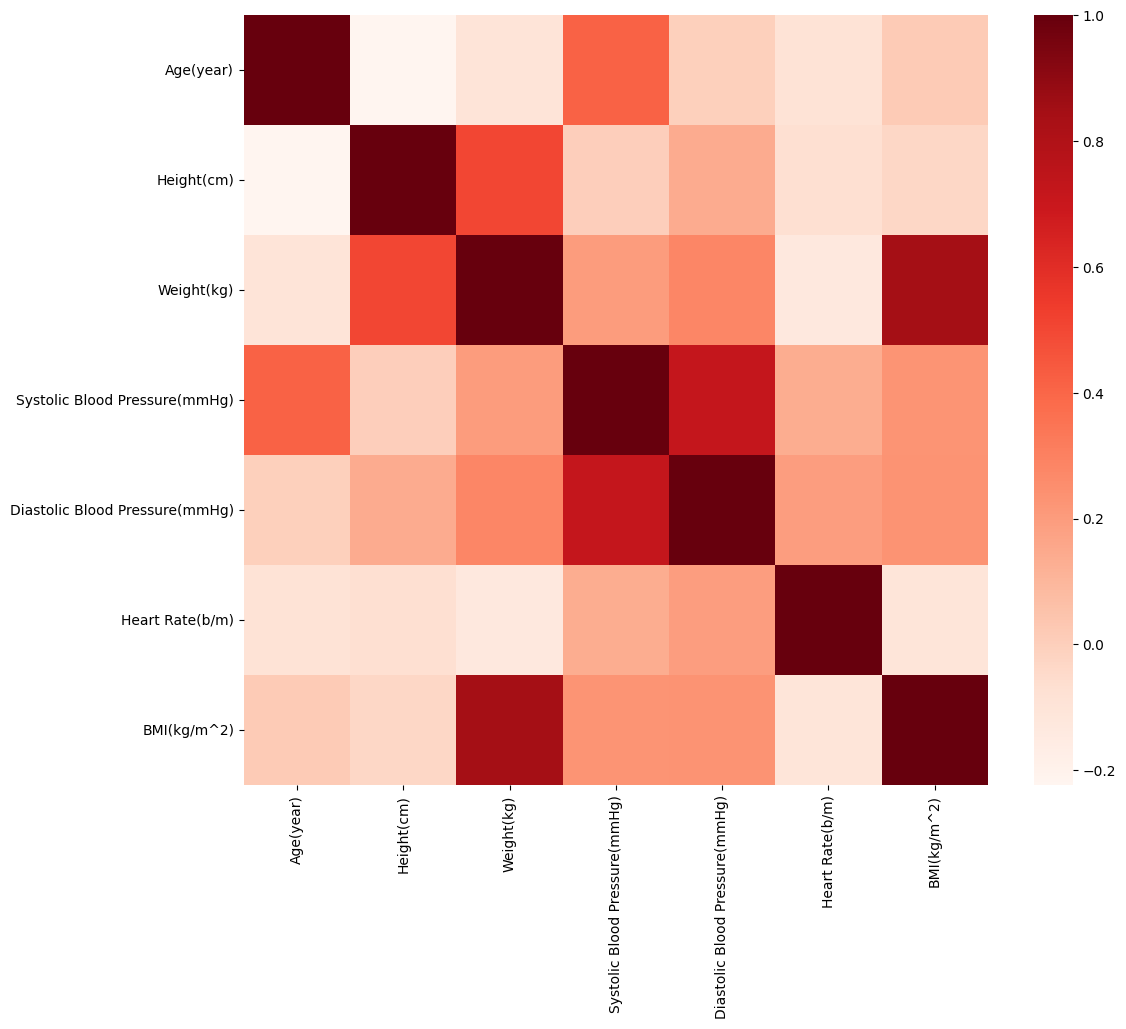

In [9]:
# We create a dataframe for removing the irrelevant columns from the dataframe and the categorical variables
df_ch4 = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease','Hypertension', "Sex(M/F)"], axis =1)
plt.figure(figsize=(12,10))
df_corr = df_ch4.corr()
sns.heatmap(df_corr, annot=False, cmap=plt.cm.Reds)
plt.show()

## 10. Code Block 10
Description: *Convert the sex column to categorical and separate the input features*

In [10]:
# Convert the Sex column into a categorical variable
df_ch3['Sex(M/F)'] = df_ch3["Sex(M/F)"].astype('category').cat.codes
df_filtered =  df_ch3
# Select input variables and separate target variable
features = df_filtered.loc[:,  df_ch3.columns != 'Hypertension']
print(features.shape)

(219, 8)


## 12. Code Block 12
Description: *Import Standard Scale, train_test_split functions, and classification report, and SVM*

In [11]:
from sklearn.preprocessing import StandardScaler # Standard scaler for prepocessing inputs
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm # Import SVM model from scikit-learn
from sklearn.metrics import classification_report
# Split dataset into training set and test set
y = df_filtered[['Hypertension']].values[0:165]
x2 = df_filtered[["Age(year)","BMI(kg/m^2)",'Weight(kg)','Heart Rate(b/m)','Sex(M/F)','Height(cm)']].values[0:165]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.25,random_state=1) # 75% training and 25% test

## 13. Code Block 13
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [15]:
df_var_box = pd.DataFrame(x2, columns=["Age(year)","BMI(kg/m^2)",'Weight(kg)','Heart Rate(b/m)','Sex(M/F)','Height(cm)'])
df_var_box['Hypertension Class'] = y.ravel()
df_var_box.shape

(165, 7)

## 14. Code Block 14
## Welch's t-test and Mann–Whitney U Test: Group Comparison

This analysis compares each feature between two groups of subjects:
- **Normotensive** (normal blood pressure)
- **Prehypertensive** (elevated blood pressure)

Two statistical tests are used:
- **Welch's t-test**: Assesses differences in means assuming unequal variances.
- **Mann–Whitney U test**: A non-parametric test used when the normality assumption is violated.

The aim is to identify features with statistically significant differences between the two groups.


In [16]:
import scipy.stats

# Extract age values for two groups:
# Group 1: "Normal" — index 0 to 79 (80 samples)
normal_age = df_var_box['Age(year)'].values[0:80]

# Group 2: "Pre-hypertensive" — index 81 to 164 (84 samples)
pre_age = df_var_box['Age(year)'].values[81:165]

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = scipy.stats.ttest_ind(a=normal_age, b=pre_age, equal_var=False)

# Compute group statistics
mean_normal = np.mean(normal_age)
mean_pre = np.mean(pre_age)
std_normal = np.std(normal_age, ddof=1)
std_pre = np.std(pre_age, ddof=1)

# Print formatted results
print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3g}")
print(f"Group: NORMAL | Mean Age = {mean_normal:.2f} | Std Dev = {std_normal:.2f}")
print(f"Group: PRE    | Mean Age = {mean_pre:.2f} | Std Dev = {std_pre:.2f}")

T-test results: t-statistic = -4.260, p-value = 3.53e-05
Group: NORMAL | Mean Age = 49.42 | Std Dev = 17.17
Group: PRE    | Mean Age = 60.00 | Std Dev = 14.42


In [17]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# Perform Mann–Whitney U test
U1, p = mannwhitneyu(normal_age, pre_age, alternative='two-sided')

# Group sizes
nx, ny = len(normal_age), len(pre_age)

# Compute the second U value (U2)
U2 = nx * ny - U1
print(f"U2 statistic: {U2}")

# Expected U mean and standard deviation (under H0)
mu_U = nx * ny / 2
sigma_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)

# Compute Z-score for the normal approximation
z = (U1 - mu_U) / sigma_U

# Two-tailed p-value from Z (manual)
p_manual = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))

# Display results
print(f"Mann–Whitney U Test Results:")
print(f"U1: {U1:.2f} | U2: {U2:.2f} | p-value (scipy): {p:.4f}")
print(f"Z-score: {z:.3f} | p-value (manual): {p_manual:.4f}")
print(f"Median Age — NORMAL: {np.median(normal_age):.2f} | PRE-HYPERTENSION: {np.median(pre_age):.2f}")

# (Optional) run again to confirm result (not necessary but harmless)
mannwhitneyu(normal_age, pre_age, alternative='two-sided')

U2 statistic: 4549.0
Mann–Whitney U Test Results:
U1: 2171.00 | U2: 4549.00 | p-value (scipy): 0.0001
Z-score: -3.912 | p-value (manual): 0.0001
Median Age — NORMAL: 53.00 | PRE-HYPERTENSION: 61.00


MannwhitneyuResult(statistic=np.float64(2171.0), pvalue=np.float64(9.17333275520593e-05))

In [18]:
# Extract BMI values for two groups
normal_bmi = df_var_box['BMI(kg/m^2)'].values[0:80]
pre_bmi = df_var_box['BMI(kg/m^2)'].values[81:165]

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = scipy.stats.ttest_ind(a=normal_bmi, b=pre_bmi, equal_var=False)

# Compute descriptive statistics
mean_normal = np.mean(normal_bmi)
mean_pre = np.mean(pre_bmi)
std_normal = np.std(normal_bmi, ddof=1)  # Sample standard deviation
std_pre = np.std(pre_bmi, ddof=1)

# Print results
print(f"Welch’s t-test results: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Group: NORMAL           | Mean = {mean_normal:.2f} | Std Dev = {std_normal:.2f}")
print(f"Group: PRE-HYPERTENSION | Mean = {mean_pre:.2f}   | Std Dev = {std_pre:.2f}")

Welch’s t-test results: t = -1.677, p = 0.0954
Group: NORMAL           | Mean = 22.14 | Std Dev = 3.85
Group: PRE-HYPERTENSION | Mean = 23.09   | Std Dev = 3.35


In [19]:
from scipy.stats import mannwhitneyu
# Perform Mann–Whitney U test
U1, p = mannwhitneyu(normal_bmi, pre_bmi, alternative='two-sided')

# Sample sizes
nx, ny = len(normal_bmi), len(pre_bmi)

# Compute U2
U2 = nx * ny - U1
print(f"U2 statistic: {U2}")

# Calculate mean and standard deviation of U under null hypothesis
mu_U = nx * ny / 2
sigma_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)

# Compute Z-score for normal approximation
z = (U1 - mu_U) / sigma_U

# Two-tailed p-value from Z (manual calculation)
p_manual = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))

# Print results
print(f"U1: {U1:.2f} | U2: {U2:.2f} | p-value (scipy): {p:.4f}")
print(f"Z-score: {z:.3f} | p-value (manual): {p_manual:.4f}")
print(f"Median BMI — NORMAL: {np.median(normal_bmi):.2f} | PRE-HYPERTENSION: {np.median(pre_bmi):.2f}")

# (Optional) Run test again (not required)
mannwhitneyu(normal_bmi, pre_bmi, alternative='two-sided')

U2 statistic: 4031.0
U1: 2689.00 | U2: 4031.00 | p-value (scipy): 0.0274
Z-score: -2.207 | p-value (manual): 0.0273
Median BMI — NORMAL: 21.27 | PRE-HYPERTENSION: 22.66


MannwhitneyuResult(statistic=np.float64(2689.0), pvalue=np.float64(0.027393097831422877))

In [20]:
# Extract Heart Rate data for the two groups
normal_heart = df_var_box['Heart Rate(b/m)'].values[0:80]
pre_heart = df_var_box['Heart Rate(b/m)'].values[81:165]

# Perform Welch's t-test (unequal variances)
t_stat, p_value = scipy.stats.ttest_ind(a=normal_heart, b=pre_heart, equal_var=False)

# Calculate means and sample standard deviations (ddof=1)
mean_normal = np.mean(normal_heart)
mean_pre = np.mean(pre_heart)
std_normal = np.std(normal_heart, ddof=1)
std_pre = np.std(pre_heart, ddof=1)

# Print formatted results
print(f"Welch’s t-test results: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Group: NORMAL           | Mean HR = {mean_normal:.2f} bpm | Std Dev = {std_normal:.2f}")
print(f"Group: PRE-HYPERTENSION | Mean HR = {mean_pre:.2f} bpm | Std Dev = {std_pre:.2f}")

Welch’s t-test results: t = 0.564, p = 0.5738
Group: NORMAL           | Mean HR = 73.69 bpm | Std Dev = 10.30
Group: PRE-HYPERTENSION | Mean HR = 72.77 bpm | Std Dev = 10.46


In [21]:
from scipy.stats import mannwhitneyu
# Mann–Whitney U test (two-sided)
U1, p = mannwhitneyu(normal_heart, pre_heart, alternative='two-sided')

# Sample sizes
nx, ny = len(normal_heart), len(pre_heart)

# Compute the other U statistic
U2 = nx * ny - U1

# Expected mean and standard deviation of U under null hypothesis
mu_U = nx * ny / 2
sigma_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)

# Compute Z-score using U2 (can use either U1 or U2)
z = (U2 - mu_U) / sigma_U

# Calculate two-tailed p-value from Z-score
p_manual = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))

# Print all relevant results
print(f"U1 statistic: {U1:.2f}")
print(f"U2 statistic: {U2:.2f}")
print(f"P-value (scipy): {p:.4f}")
print(f"Z-score: {z:.3f}")
print(f"P-value (manual from Z): {p_manual:.4f}")
print(f"Median Heart Rate — NORMAL: {np.median(normal_heart):.2f} bpm | PRE-HYPERTENSION: {np.median(pre_heart):.2f} bpm")

U1 statistic: 3602.00
U2 statistic: 3118.00
P-value (scipy): 0.4266
Z-score: -0.796
P-value (manual from Z): 0.4260
Median Heart Rate — NORMAL: 73.50 bpm | PRE-HYPERTENSION: 72.00 bpm


In [22]:
# Extract weight data for the two groups
normal_weight = df_var_box['Weight(kg)'].values[0:80]
pre_weight = df_var_box['Weight(kg)'].values[81:165]

# Perform Welch's t-test (unequal variances)
t_stat, p_value = scipy.stats.ttest_ind(a=normal_weight, b=pre_weight, equal_var=False)

# Compute descriptive statistics
mean_normal = np.mean(normal_weight)
mean_pre = np.mean(pre_weight)
std_normal = np.std(normal_weight, ddof=1)  # Sample std deviation
std_pre = np.std(pre_weight, ddof=1)

# Print formatted results
print(f"Welch’s t-test results: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Group: NORMAL           | Mean Weight = {mean_normal:.2f} kg | Std Dev = {std_normal:.2f}")
print(f"Group: PRE-HYPERTENSION | Mean Weight = {mean_pre:.2f} kg   | Std Dev = {std_pre:.2f}")

Welch’s t-test results: t = -1.361, p = 0.1754
Group: NORMAL           | Mean Weight = 57.83 kg | Std Dev = 10.89
Group: PRE-HYPERTENSION | Mean Weight = 60.21 kg   | Std Dev = 11.59


In [23]:
from scipy.stats import mannwhitneyu
# Perform Mann–Whitney U test (two-sided)
U1, p = mannwhitneyu(normal_weight, pre_weight, alternative='two-sided')

# Sample sizes for the correct groups
nx, ny = len(normal_weight), len(pre_weight)

# Compute the second U statistic
U2 = nx * ny - U1

# Expected mean and standard deviation of U under null hypothesis
mu_U = nx * ny / 2
sigma_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)

# Compute Z-score for normal approximation
z = (U1 - mu_U) / sigma_U

# Calculate two-tailed p-value from Z-score manually
p_manual = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))

# Print the results
print(f"U1 statistic: {U1:.2f}")
print(f"U2 statistic: {U2:.2f}")
print(f"P-value (scipy): {p:.4f}")
print(f"Z-score: {z:.3f}")
print(f"P-value (manual from Z): {p_manual:.4f}")
print(f"Median Weight — NORMAL: {np.median(normal_weight):.2f} kg | PRE-HYPERTENSION: {np.median(pre_weight):.2f} kg")

# Optional: verify by repeating the Mann–Whitney U test call (not required)
mannwhitneyu(normal_weight, pre_weight, alternative='two-sided')

U1 statistic: 2919.50
U2 statistic: 3800.50
P-value (scipy): 0.1470
Z-score: -1.449
P-value (manual from Z): 0.1473
Median Weight — NORMAL: 55.50 kg | PRE-HYPERTENSION: 59.50 kg


MannwhitneyuResult(statistic=np.float64(2919.5), pvalue=np.float64(0.14704640210235745))

In [24]:
# Extract Height data for the two groups
normal_height = df_var_box['Height(cm)'].values[0:80]
pre_height = df_var_box['Height(cm)'].values[81:165]

# Perform Welch's t-test (unequal variances)
t_stat, p_value = scipy.stats.ttest_ind(a=normal_height, b=pre_height, equal_var=False)

# Calculate means and sample standard deviations (ddof=1)
mean_normal = np.mean(normal_height)
mean_pre = np.mean(pre_height)
std_normal = np.std(normal_height, ddof=1)
std_pre = np.std(pre_height, ddof=1)

# Print formatted results
print(f"Welch’s t-test results: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Group: NORMAL           | Mean Height = {mean_normal:.2f} cm | Std Dev = {std_normal:.2f}")
print(f"Group: PRE-HYPERTENSION | Mean Height = {mean_pre:.2f} cm | Std Dev = {std_pre:.2f}")

Welch’s t-test results: t = 0.299, p = 0.7655
Group: NORMAL           | Mean Height = 161.54 cm | Std Dev = 8.04
Group: PRE-HYPERTENSION | Mean Height = 161.14 cm | Std Dev = 8.87


In [25]:
from scipy.stats import mannwhitneyu
# Perform Mann–Whitney U test (two-sided)
U1, p = mannwhitneyu(normal_height, pre_height, alternative='two-sided')

# Sample sizes for the correct groups
nx, ny = len(normal_height), len(pre_height)

# Compute the second U statistic
U2 = nx * ny - U1

# Expected mean and standard deviation of U under null hypothesis
mu_U = nx * ny / 2
sigma_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)

# Compute Z-score for normal approximation
z = (U1 - mu_U) / sigma_U

# Calculate two-tailed p-value from Z-score manually
p_manual = 2 * norm.cdf(z) if z < 0 else 2 * (1 - norm.cdf(z))

# Print the results
print(f"U1 statistic: {U1:.2f}")
print(f"U2 statistic: {U2:.2f}")
print(f"P-value (scipy): {p:.4f}")
print(f"Z-score: {z:.3f}")
print(f"P-value (manual from Z): {p_manual:.4f}")
print(f"Median Height — NORMAL: {np.median(normal_height):.2f} cm | PRE-HYPERTENSION: {np.median(pre_height):.2f} cm")

# Optional: verify by repeating the Mann–Whitney U test call (not required)
mannwhitneyu(normal_height, pre_height, alternative='two-sided')

U1 statistic: 3482.00
U2 statistic: 3238.00
P-value (scipy): 0.6888
Z-score: 0.401
P-value (manual from Z): 0.6882
Median Height — NORMAL: 160.00 cm | PRE-HYPERTENSION: 160.00 cm


MannwhitneyuResult(statistic=np.float64(3482.0), pvalue=np.float64(0.6888030240060277))

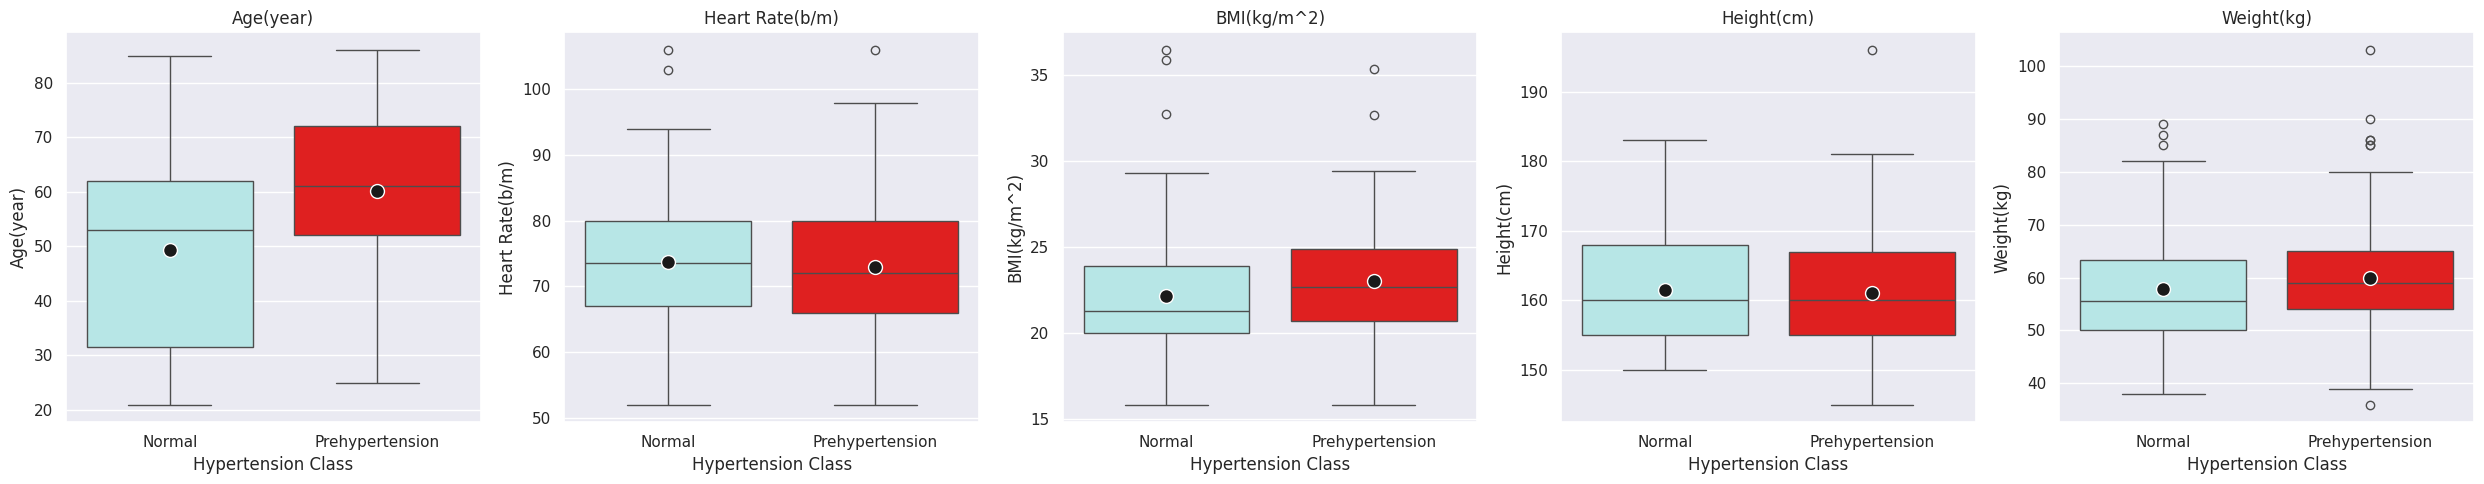

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)

variables = ["Age(year)", "Heart Rate(b/m)", "BMI(kg/m^2)", "Height(cm)", "Weight(kg)"]
palette = ['paleturquoise', 'red']
num_vars = len(variables)

fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5), sharey=False)

for ax, var in zip(axes, variables):
    sns.boxplot(
        x='Hypertension Class',
        y=var,
        hue='Hypertension Class',  # Assign hue explicitly
        data=df_var_box,
        palette=palette,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markeredgecolor": "white",
            "markerfacecolor": "k",
            "markersize": 10
        },
        ax=ax,
        dodge=False  # Prevent hue boxes from dodging, since hue=x
    )
    ax.set_title(var)
    ax.set_xlabel('Hypertension Class')
    ax.set_ylabel(var)
    legend = ax.get_legend()
    if legend is not None:
        legend.remove()

plt.tight_layout()
plt.show()






## 26. Code Block 26
## Hyperparameter Tuning for SVM using Clinical Variables

This section performs hyperparameter optimization for a **Support Vector Machine (SVM)** model using all available clinical features in the dataset.

- The goal is to find the optimal **kernel**, **regularization parameter (C)**, and **kernel-specific parameters** (e.g., `gamma` for RBF kernel) that maximize classification performance.

This process helps ensure that the model generalizes well to unseen data and avoids overfitting.

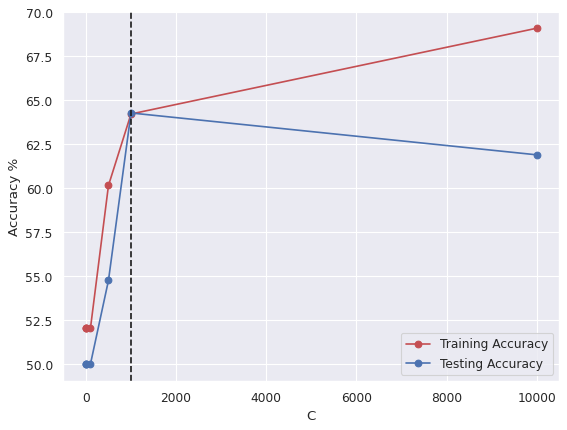

In [27]:
import seaborn
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.25,random_state=1) # 75% training and 25% test
sns.set(font_scale=1)
c = [0.1, 1, 10, 100, 500 ,1000,10000];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_svc =  SVC(C=c[i], kernel='rbf', gamma=0.00001,probability = True)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_svc.fit(X_train_scaled, y_train.ravel())
  pred_svc = clf_svc.predict(X_test_scaled)
  train_score.append(clf_svc.score(X_train_scaled,y_train)*100)
  test_score.append(clf_svc.score(X_test_scaled,y_test)*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=1000, color='k', linestyle='--', label='100')

In [31]:
# Initialize classifier with best hyperparameters
clf_svc = SVC(C=1000, kernel='rbf', gamma=0.00001, probability=True)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
clf_svc.fit(X_train_scaled, y_train.ravel())

# Predict on test data
pred_svc = clf_svc.predict(X_test_scaled)

# Evaluate performance
train_acc = clf_svc.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_acc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test.ravel(), pred_svc, digits=4))

Training Accuracy: 0.6423

Classification Report:

                 precision    recall  f1-score   support

         Normal     0.6875    0.5238    0.5946        21
Prehypertension     0.6154    0.7619    0.6809        21

       accuracy                         0.6429        42
      macro avg     0.6514    0.6429    0.6377        42
   weighted avg     0.6514    0.6429    0.6377        42



## 28. Code Block 28
Description: *Hyperparameter Tuning for Logistic Regression (LR) using Clinical Variables*

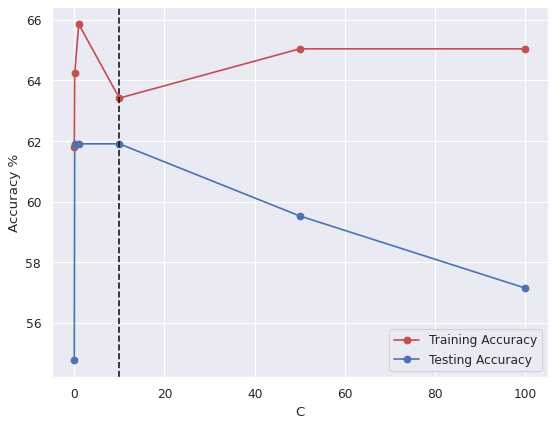

In [32]:
from sklearn.linear_model import LogisticRegression
c = [0.01,0.1, 1,10,50,100];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_lg = LogisticRegression(C=c[i], class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train_scaled,y_train.ravel())
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_lg.fit(X_train_scaled, y_train.ravel())
  pred_svc = clf_lg.predict(X_test_scaled)
  train_score.append(clf_lg.score(X_train_scaled,y_train)*100)
  test_score.append(clf_lg.score(X_test_scaled,y_test)*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=10, color='k', linestyle='--', label='100')

In [33]:
clf_lg = LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train_scaled,y_train)


pred_lg = clf_lg.predict(X_test_scaled)

# Results
print(clf_lg.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_lg, digits=4))

0.6341463414634146
                 precision    recall  f1-score   support

         Normal     0.6190    0.6190    0.6190        21
Prehypertension     0.6190    0.6190    0.6190        21

       accuracy                         0.6190        42
      macro avg     0.6190    0.6190    0.6190        42
   weighted avg     0.6190    0.6190    0.6190        42



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 30. Code Block 30
Description: *Hyperparameter tuning of k-nearest neighbor classifier*

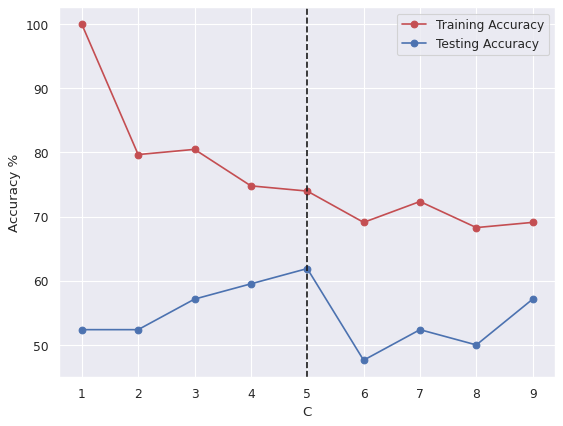

In [35]:
from sklearn.neighbors import KNeighborsClassifier
c = [1,2, 3,4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_KNN = KNeighborsClassifier(n_neighbors=c[i])
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_KNN.fit(X_train_scaled,y_train.ravel())
  pred_svc = clf_KNN.predict(X_test_scaled)
  train_score.append(clf_KNN.score(X_train_scaled,y_train.ravel())*100)
  test_score.append(clf_KNN.score(X_test_scaled,y_test.ravel())*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=5, color='k', linestyle='--', label='100')

In [36]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
clf_KNN.fit(X_train_scaled,y_train)

#Predict Output
pred_KNN = clf_KNN.predict(X_test_scaled)


# Results

print(clf_KNN.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_KNN, digits=4))

0.7398373983739838
                 precision    recall  f1-score   support

         Normal     0.6316    0.5714    0.6000        21
Prehypertension     0.6087    0.6667    0.6364        21

       accuracy                         0.6190        42
      macro avg     0.6201    0.6190    0.6182        42
   weighted avg     0.6201    0.6190    0.6182        42



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 32. Code Block 32
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train_scaled, y_train)


pred_LDA = clf_LDA.predict(X_test_scaled)

# Results
print(clf_LDA.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_LDA, digits = 4))

0.6504065040650406
                 precision    recall  f1-score   support

         Normal     0.5714    0.5714    0.5714        21
Prehypertension     0.5714    0.5714    0.5714        21

       accuracy                         0.5714        42
      macro avg     0.5714    0.5714    0.5714        42
   weighted avg     0.5714    0.5714    0.5714        42



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 33. Code Block 33
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

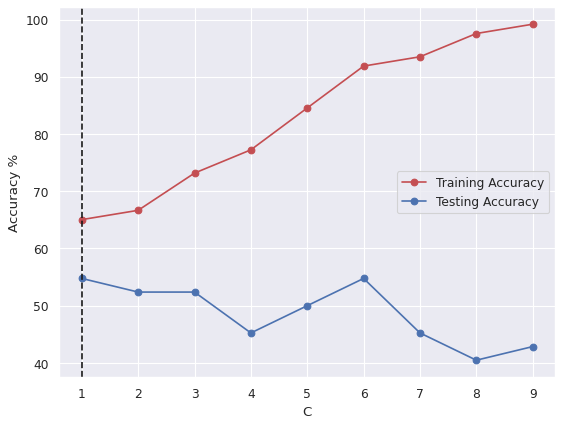

In [71]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.25,random_state=1) # 75% training and 25% test

c = [1,2, 3,4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_DT = DecisionTreeClassifier(criterion="gini", max_depth=c[i])
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_DT.fit(X_train,y_train)
  train_score.append(clf_DT.score(X_train,y_train)*100)
  test_score.append(clf_DT.score(X_test,y_test)*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=1, color='k', linestyle='--', label='100')

In [69]:
clf_DT = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf_DT.fit(X_train,y_train)
pred_DT = clf_DT.predict(X_test)
print(clf_DT.score(X_train, y_train))
print(classification_report(y_test.ravel(), pred_DT, digits=4))

0.6504065040650406
                 precision    recall  f1-score   support

         Normal     0.5357    0.7143    0.6122        21
Prehypertension     0.5714    0.3810    0.4571        21

       accuracy                         0.5476        42
      macro avg     0.5536    0.5476    0.5347        42
   weighted avg     0.5536    0.5476    0.5347        42



In [72]:
feature_imp = pd.Series(clf_DT.feature_importances_,index=["Age(year)","BMI(kg/m^2)",'Weight(kg)','Heart Rate(b/m)','Sex(M/F)','Height(cm)']).sort_values(ascending=False)
feature_imp

,0
BMI(kg/m^2),0.287842
Age(year),0.266127
Weight(kg),0.199291
Height(cm),0.133788
Heart Rate(b/m),0.096395
Sex(M/F),0.016557


## 36. Code Block 36
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

## 37. Code Block 37
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

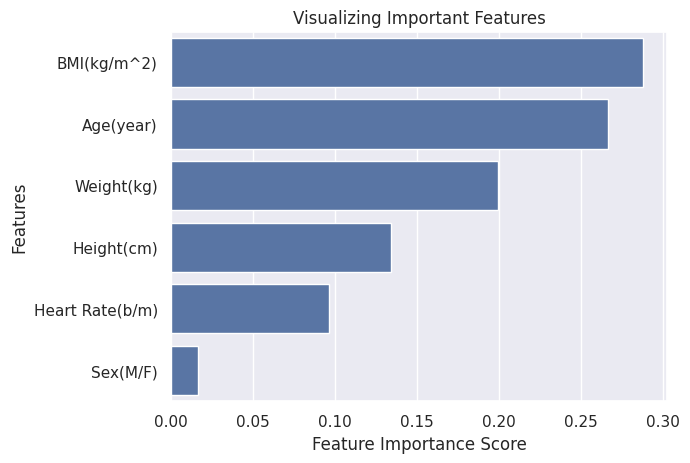

In [73]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

## 38. Code Block 38
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [49]:
# Import train_test_split function
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
# Split dataset into training set and test set
y = df_filtered[['Hypertension']].values[0:165]
x3 = df_filtered[["Age(year)","BMI(kg/m^2)",'Heart Rate(b/m)']].values[0:165]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.25,random_state=1) # 70% training and 30% test

In [50]:
c = list(df_filtered["Hypertension"][0:165].astype('category').cat.codes[0:165])

In [51]:
for i in range(len(c)):
  if c[i] == 0:
    c[i] = "red"
  else:
    c[i] = "blue"

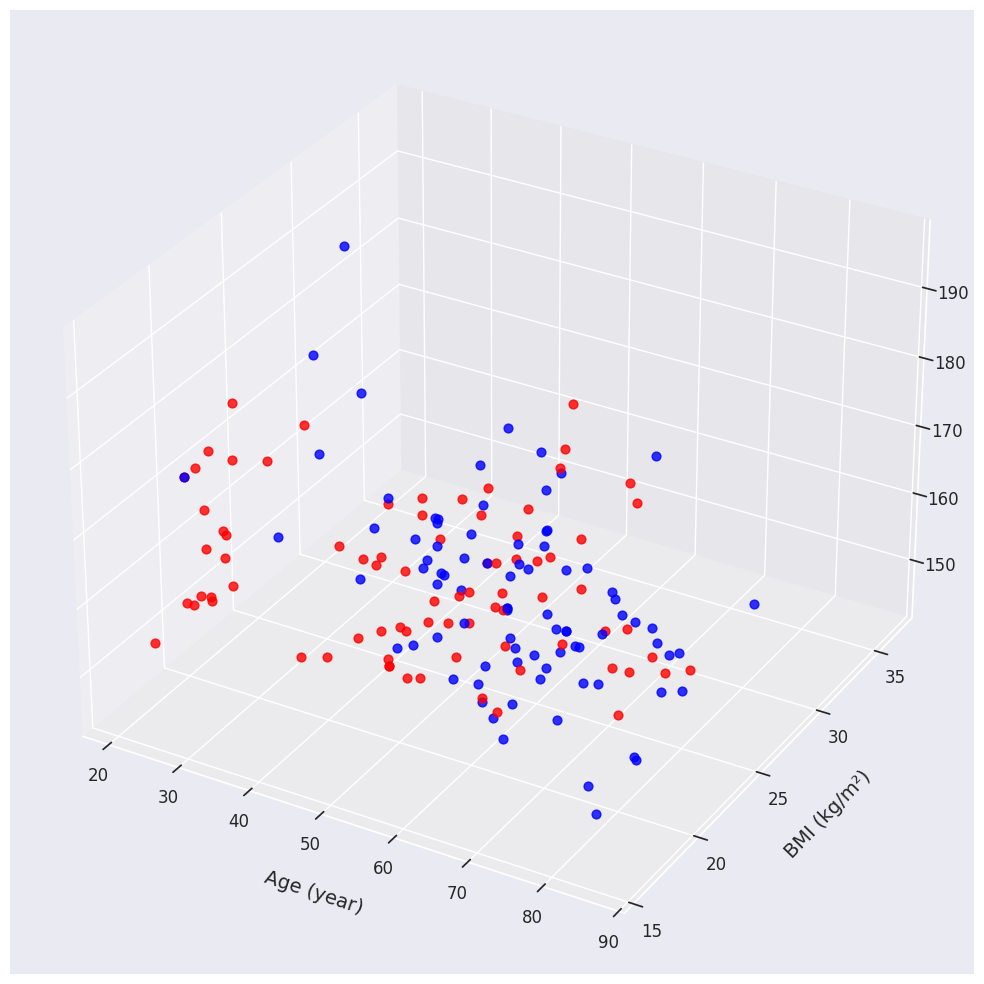

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = list(df_filtered[["Age(year)"]].values[0:165].T[0])
Y = list(df_filtered[["BMI(kg/m^2)"]].values[0:165].T[0])
Z = list(df_filtered[["Height(cm)"]].values[0:165].T[0])

fig = plt.figure(figsize=(12, 10))  # Larger figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter points
for i in range(len(X)):
    ax.scatter(X[i], Y[i], Z[i], color=c[i], s=40, alpha=0.8)

# Improve axis labels
ax.set_xlabel('Age (year)', fontsize=14, labelpad=15)
ax.set_ylabel('BMI (kg/m²)', fontsize=14, labelpad=15)
ax.set_zlabel('Height (cm)', fontsize=14, labelpad=15)

# Increase tick font size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

In [53]:
from sklearn.svm import SVC

# defined classifier characteristics
clf_svc =  SVC(C=1000, kernel='rbf', gamma=0.001,probability = True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifier train and predict
clf_svc.fit(X_train_scaled, y_train.ravel())
pred_svc = clf_svc.predict(X_test_scaled)

# Results
print(clf_svc.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_svc, digits=4))

0.6910569105691057
                 precision    recall  f1-score   support

         Normal     0.7059    0.5714    0.6316        21
Prehypertension     0.6400    0.7619    0.6957        21

       accuracy                         0.6667        42
      macro avg     0.6729    0.6667    0.6636        42
   weighted avg     0.6729    0.6667    0.6636        42



## 43. Code Block 43
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [54]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import recall_score, make_scorer, f1_score

# Define custom scorers
specificity_scorer = make_scorer(recall_score, pos_label='Normal')
sensitivity_scorer = make_scorer(recall_score, pos_label='Prehypertension')
f1_scorer = make_scorer(f1_score, pos_label='Prehypertension')

# Cross-validation configuration
cv = ShuffleSplit(n_splits=5, random_state=0)

# Evaluate model using accuracy
accuracy_scores = cross_val_score(clf_svc, scaler.transform(x3), y.ravel(), cv=cv, scoring='accuracy')

# Evaluate with custom scorers
f1_scores = cross_val_score(clf_svc, scaler.transform(x3), y.ravel(), cv=cv, scoring=f1_scorer)
specificity_scores = cross_val_score(clf_svc, scaler.transform(x3), y.ravel(), cv=cv, scoring=specificity_scorer)
sensitivity_scores = cross_val_score(clf_svc, scaler.transform(x3), y.ravel(), cv=cv, scoring=sensitivity_scorer)

# Print results
print("Specificity:  {:.3f} ± {:.3f}".format(specificity_scores.mean(), specificity_scores.std()))
print("Sensitivity:  {:.3f} ± {:.3f}".format(sensitivity_scores.mean(), sensitivity_scores.std()))
print("F1 Score:     {:.3f} ± {:.3f}".format(f1_scores.mean(), f1_scores.std()))
print("Accuracy:     {:.3f} ± {:.3f}".format(accuracy_scores.mean(), accuracy_scores.std()))


Specificity:  0.359 ± 0.146
Sensitivity:  0.886 ± 0.061
F1 Score:     0.706 ± 0.124
Accuracy:     0.624 ± 0.132


## 44. Code Block 44
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

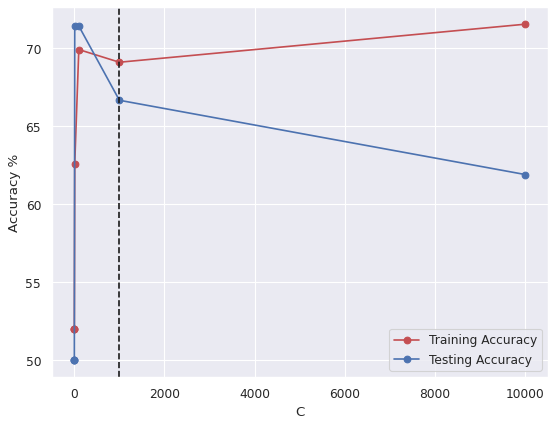

In [55]:
import seaborn
sns.set(font_scale=1)
c = [0.01,0.1, 1,10, 100,1000,10000];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_svc =  SVC(C=c[i], kernel='rbf', gamma=0.001,probability = True)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_svc.fit(X_train_scaled, y_train.ravel())
  pred_svc = clf_svc.predict(X_test_scaled)
  train_score.append(clf_svc.score(X_train_scaled,y_train)*100)
  test_score.append(clf_svc.score(X_test_scaled,y_test)*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=1000, color='k', linestyle='--', label='100')

## 45. Code Block 45
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [57]:
from sklearn.linear_model import LogisticRegression

clf_lg = LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train_scaled,y_train)


pred_lg = clf_lg.predict(X_test_scaled)

# Results
print(clf_lg.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_lg, digits =4))

0.6341463414634146
                 precision    recall  f1-score   support

         Normal     0.6190    0.6190    0.6190        21
Prehypertension     0.6190    0.6190    0.6190        21

       accuracy                         0.6190        42
      macro avg     0.6190    0.6190    0.6190        42
   weighted avg     0.6190    0.6190    0.6190        42



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 46. Code Block 46
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

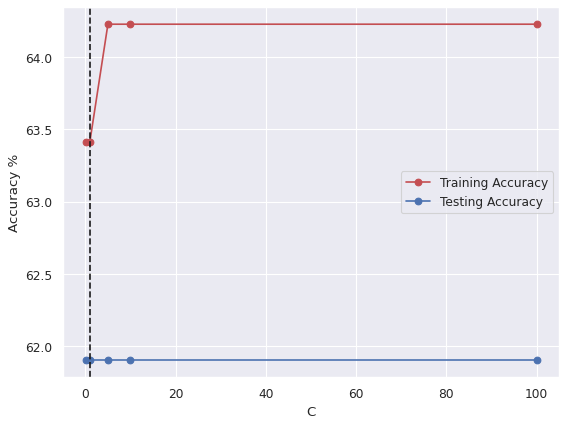

In [58]:
c = [0.1,1,5,10,100];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_lg = LogisticRegression(C=c[i], class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train_scaled,y_train.ravel())
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_lg.fit(X_train_scaled, y_train.ravel())
  pred_svc = clf_lg.predict(X_test_scaled)
  train_score.append(clf_lg.score(X_train_scaled,y_train.ravel())*100)
  test_score.append(clf_lg.score(X_test_scaled,y_test.ravel())*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=1, color='k', linestyle='--', label='100')

## 47. Code Block 47
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=8)

# Train the model using the training sets
clf_KNN.fit(X_train_scaled,y_train.ravel())

#Predict Output
pred_KNN = clf_KNN.predict(X_test_scaled)


# Results

print(clf_KNN.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_KNN, digits = 4))

0.7235772357723578
                 precision    recall  f1-score   support

         Normal     0.6190    0.6190    0.6190        21
Prehypertension     0.6190    0.6190    0.6190        21

       accuracy                         0.6190        42
      macro avg     0.6190    0.6190    0.6190        42
   weighted avg     0.6190    0.6190    0.6190        42



## 48. Code Block 48
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

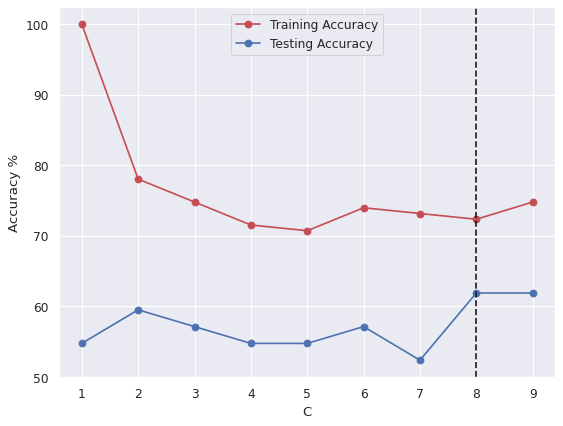

In [60]:
c = [1,2, 3,4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_KNN = KNeighborsClassifier(n_neighbors=c[i])
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_KNN.fit(X_train_scaled,y_train.ravel())
  pred_svc = clf_KNN.predict(X_test_scaled)
  train_score.append(clf_KNN.score(X_train_scaled,y_train.ravel())*100)
  test_score.append(clf_KNN.score(X_test_scaled,y_test.ravel())*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=8, color='k', linestyle='--', label='100')

## 49. Code Block 49
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train_scaled, y_train.ravel())


pred_LDA = clf_LDA.predict(X_test_scaled)

# Results
print(clf_LDA.score(X_train_scaled, y_train))
print(classification_report(y_test.ravel(), pred_LDA, digits=4))

0.6341463414634146
                 precision    recall  f1-score   support

         Normal     0.6190    0.6190    0.6190        21
Prehypertension     0.6190    0.6190    0.6190        21

       accuracy                         0.6190        42
      macro avg     0.6190    0.6190    0.6190        42
   weighted avg     0.6190    0.6190    0.6190        42



## 50. Code Block 50
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf_DT.fit(X_train,y_train)
pred_DT = clf_DT.predict(X_test)
print(clf_DT.score(X_train, y_train))
print(classification_report(y_test.ravel(), pred_DT, digits = 4))

0.6504065040650406
                 precision    recall  f1-score   support

         Normal     0.5357    0.7143    0.6122        21
Prehypertension     0.5714    0.3810    0.4571        21

       accuracy                         0.5476        42
      macro avg     0.5536    0.5476    0.5347        42
   weighted avg     0.5536    0.5476    0.5347        42



## 51. Code Block 51
Description: *Please describe what this block does (e.g., signal loading, filtering, peak detection, etc.)*

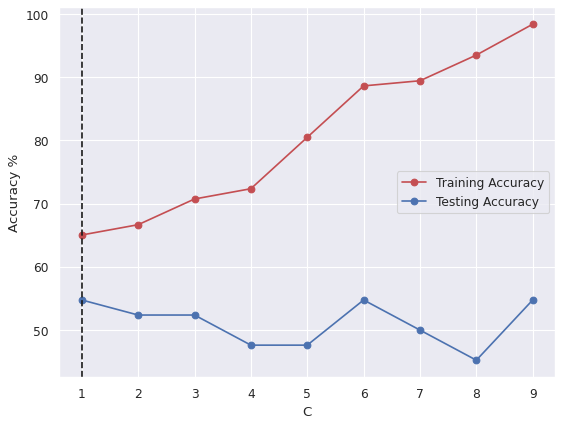

In [63]:
c = [1,2, 3,4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_DT = DecisionTreeClassifier(criterion="gini", max_depth=c[i])
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Classifier train and predict
  clf_DT.fit(X_train,y_train)
  train_score.append(clf_DT.score(X_train,y_train)*100)
  test_score.append(clf_DT.score(X_test,y_test)*100)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=1, color='k', linestyle='--', label='100')

## Conclusion
This notebook provides a step-by-step process for preparing features from PPG signals. The extracted variables can now be used to train machine learning models for blood pressure prediction.